In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('LatestAirQualityUCI.csv')

In [3]:
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [4]:
#MultiClass classification
#drop Date & Time - done 
# -200 to NA to Mean of the column 
#Change categorical column or target variable into numerical if needed 

In [5]:
df2 = df.drop(['Date', 'Time'], axis=1, inplace = True)
#df2 = df.drop(['B','C'], axis=1)

In [6]:
df.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [7]:
df.replace(to_replace =-200, 
                 value = np.nan, inplace= True ) 

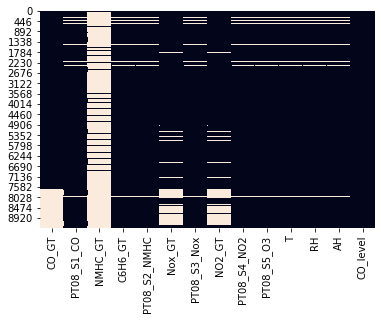

In [8]:
#Displays all the null values 
sns.heatmap(df.isnull(), cbar= False)

In [9]:
#Based on the above we can remove NMHC_GT column 
df.drop(['NMHC_GT'], axis=1, inplace = True)

In [10]:
df.head() #Display the updated data 

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11.9,2008.0,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High
1,11.5,1918.0,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High
2,10.2,1802.0,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High
3,10.2,1982.0,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High
4,10.1,1956.0,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High


In [11]:
df['CO_GT'].fillna((df['CO_GT'].mean()), inplace=True)

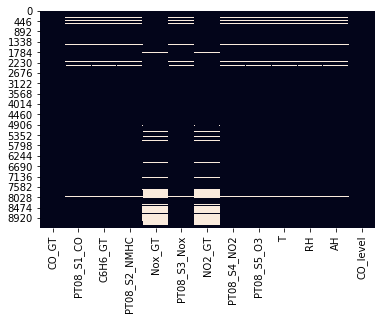

In [12]:
sns.heatmap(df.isnull(), cbar= False) #Which means the above code is working 

In [13]:
df['PT08_S1_CO'].fillna((df['PT08_S1_CO'].mean()), inplace=True)
df['C6H6_GT'].fillna((df['C6H6_GT'].mean()), inplace=True)
df['PT08_S2_NMHC'].fillna((df['PT08_S2_NMHC'].mean()), inplace=True)
df['Nox_GT'].fillna((df['Nox_GT'].mean()), inplace=True)
df['PT08_S3_Nox'].fillna((df['PT08_S3_Nox'].mean()), inplace=True)
df['NO2_GT'].fillna((df['NO2_GT'].mean()), inplace=True)
df['PT08_S4_NO2'].fillna((df['PT08_S4_NO2'].mean()), inplace=True)
df['PT08_S5_O3'].fillna((df['PT08_S5_O3'].mean()), inplace=True)
df['T'].fillna((df['T'].mean()), inplace=True)
df['RH'].fillna((df['RH'].mean()), inplace=True)
df['AH'].fillna((df['AH'].mean()), inplace=True)

<Figure size 1440x720 with 0 Axes>

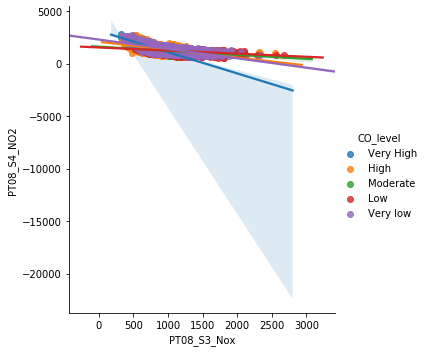

In [14]:
plt.figure(figsize=(20,10))
sns.lmplot(x ='PT08_S3_Nox', y='PT08_S4_NO2', data = df, hue = 'CO_level')

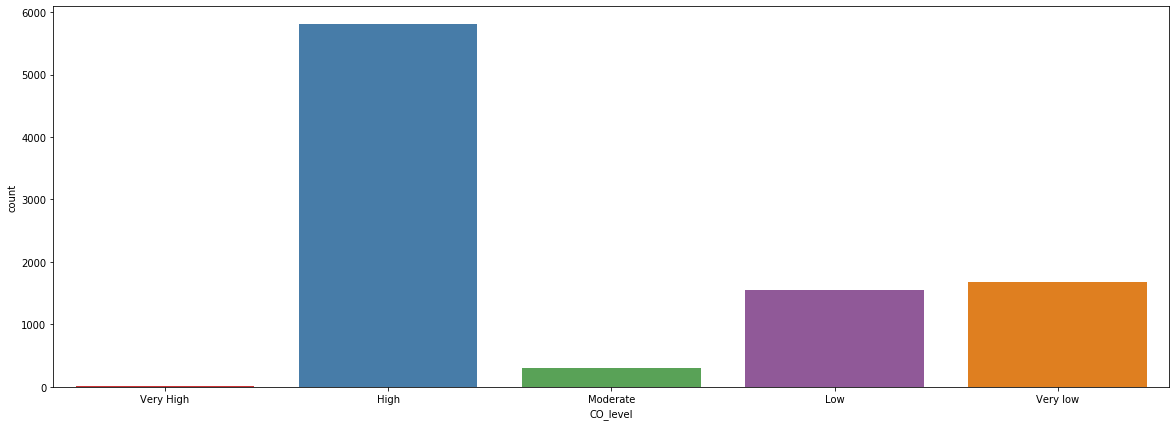

In [15]:
plt.figure(figsize=(20,7))
sns.countplot(x='CO_level',data=df,palette='Set1')

In [16]:
#sns.pairplot(df)

In [17]:
#Put in list and plot 
#CO_GT, PT08_S1_CO, C6H6_GT, PT08_S2_NMHC, Nox_GT, PT08_S3_Nox, NO2_GT, PT08_S4_NO2, PT08_S5_O3
Carbon_mono =df['CO_GT'].max()
Tin_oxide = df['PT08_S1_CO'].max()
Benzene = df['C6H6_GT'].max()
Titania = df['PT08_S2_NMHC'].max()
Nox = df['Nox_GT'].max()
tungsten_oxide = df['PT08_S3_Nox'].max()
Nitrogen_dioxide = df['NO2_GT'].max()
tungsten_oxide_NO2 = df['PT08_S4_NO2'].max()
indium_oxide = df['PT08_S5_O3'].max()

In [18]:
list_of_pollutents= [Carbon_mono,Tin_oxide,Benzene,Titania,Nox,tungsten_oxide,Nitrogen_dioxide,tungsten_oxide_NO2,indium_oxide]

In [19]:
list_of_pollutents

[11.9, 2040.0, 63.7, 2214.0, 1479.0, 2683.0, 340.0, 2775.0, 2523.0]

Text(0.5, 0, 'Highest value in the chemicals')

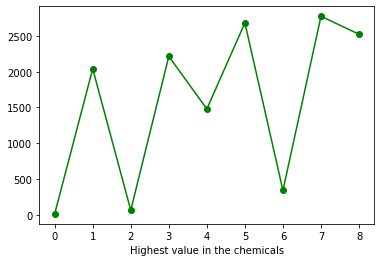

In [20]:
plt.plot(list_of_pollutents, color='green', marker='o')
plt.xlabel('Highest value in the chemicals')

Text(0.5, 0, 'Highest value in the chemicals')

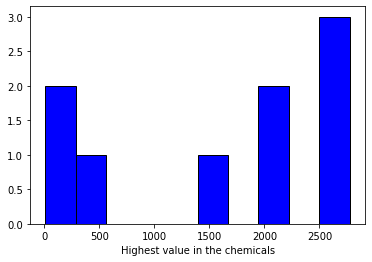

In [21]:

plt.hist(list_of_pollutents, rwidth=2, color = 'blue', ec='black')
plt.xlabel('Highest value in the chemicals')

In [22]:
from sklearn import preprocessing

In [23]:
le = preprocessing.LabelEncoder()

In [24]:
df['CO_level']= le.fit_transform(df['CO_level'])

In [25]:
df['CO_level']

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9327    4
9328    4
9329    4
9330    4
9331    4
9332    4
9333    4
9334    4
9335    4
9336    4
9337    4
9338    4
9339    4
9340    4
9341    4
9342    4
9343    4
9344    4
9345    4
9346    4
9347    4
9348    4
9349    4
9350    4
9351    4
9352    4
9353    4
9354    4
9355    4
9356    4
Name: CO_level, Length: 9357, dtype: int32

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
#scaler = StandardScaler()

In [28]:
#df = scaler.fit_transform(df) 

In [29]:
df.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11.9,2008.0,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,3
1,11.5,1918.0,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,3
2,10.2,1802.0,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,3
3,10.2,1982.0,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,3
4,10.1,1956.0,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,3


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df.columns

Index(['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
       'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH',
       'CO_level'],
      dtype='object')

In [32]:
X = df[['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
      'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH']]

In [33]:
y = df['CO_level']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression().fit(X_train, y_train)

C:\Users\15704\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\15704\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [37]:
clf_score = clf.score(X_test, y_test)

In [38]:
clf_score #SCORE 

0.8123219373219374

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [41]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
neigh_predict = neigh.predict(X_test)

In [43]:
neigh_predict #Predicts the class labels 

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
neigh_score = neigh.score(X_test, y_test)

In [45]:
neigh_score #SCORE 

0.8098290598290598

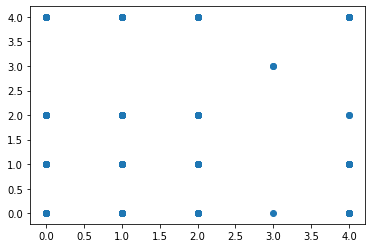

In [46]:
plt.scatter(y_test, neigh_predict)

In [47]:
#X_train, X_test, y_train, y_test

In [48]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6549, 12) (2808, 12) (6549,) (2808,)


In [49]:
from sklearn import svm

In [50]:
svm_clf = svm.SVC(gamma='scale')

In [51]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
svm_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
svm_clf_score =svm_clf.score(X_test, y_test) #SCORE 

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc_clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)

In [56]:
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
rfc_clf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [58]:
rfc_clf_score =rfc_clf.score(X_test, y_test) #SCORE

In [59]:
collective_scores = [rfc_clf_score,svm_clf_score,neigh_score,clf_score ]

In [60]:
collective_score_names = ['rfc_clf_score','svm_clf_score','neigh_score','clf_score']

In [61]:
rfc_clf_score

0.8084045584045584

In [62]:
svm_clf_score

0.7571225071225072

In [63]:
neigh_score

0.8098290598290598

In [64]:
clf_score

0.8123219373219374

In [65]:
collective_scores

[0.8084045584045584,
 0.7571225071225072,
 0.8098290598290598,
 0.8123219373219374]

Text(0.5, 0, 'Accuracy score')

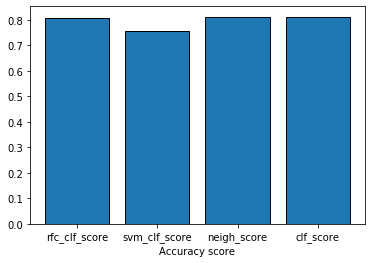

In [66]:
plt.bar(collective_score_names, collective_scores, ec = 'black', tick_label = collective_score_names)
plt.xlabel('Accuracy score')


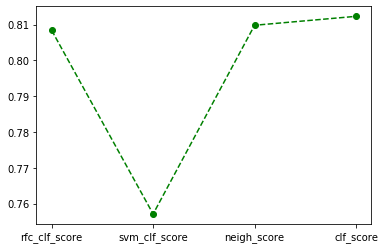

In [67]:
plt.plot(collective_score_names, collective_scores, color='green', marker='o', linestyle='dashed')

In [ ]:
sns.heatmap( df, annot=True, linewidths=.5, cmap = 'coolwarm')


Text(0.5, 1, 'Correlation Matrix')

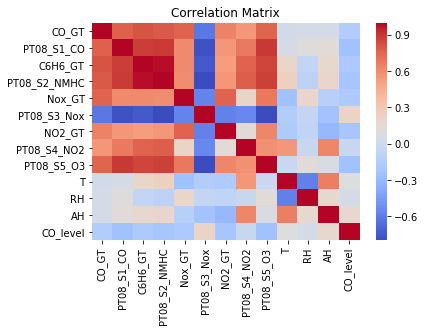

In [69]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation Matrix')